# Introduction
Heart Disease describes a range of conditions that affect your heart.  
Heart disease symptoms may be different for men and women. For instance, men are more likely to have chest pain; women are more likely to have other symptoms along with chest discomfort.
This Dataset contains 76 attributes which includes variables with a target condition of having or not having heart diesease.

## Data Attributes Description
1. age --> The person's age in years
2. sex --> The person's sex (1 = male, 0 = female)
3. cp --> The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. trestbps --> The person's resting blood pressure (mm Hg on admission to the hospital)
5. chol --> The person's cholesterol measurement in mg/dl
6. fbs --> The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg --> Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach --> The person's maximum heart rate achieved
9. exang --> Exercise induced angina (1 = yes; 0 = no)
10. oldpeak --> ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. ca --> The number of major vessels (0-3)
13. thal --> A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target --> Heart disease (0 = no, 1 = yes)

In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Reading the data

In [41]:
df=pd.read_csv('heart.csv')

In [71]:
df.info()
# to get concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [70]:
df.describe()
# describe numerical values - mean, standard deviation, min, max

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [73]:
# See how many rows and columns are present 
df.shape

(303, 14)

In [72]:
# To find the how many missing values in our data 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Exploration
We need to explore our data by using various plots using matplotlib.pyplot as plt library,seaborn as sns library. 
By doing this we can visually analyse each and every variables in our data.


In [104]:
# This provides us with the 'mean' subset of the describe() method
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


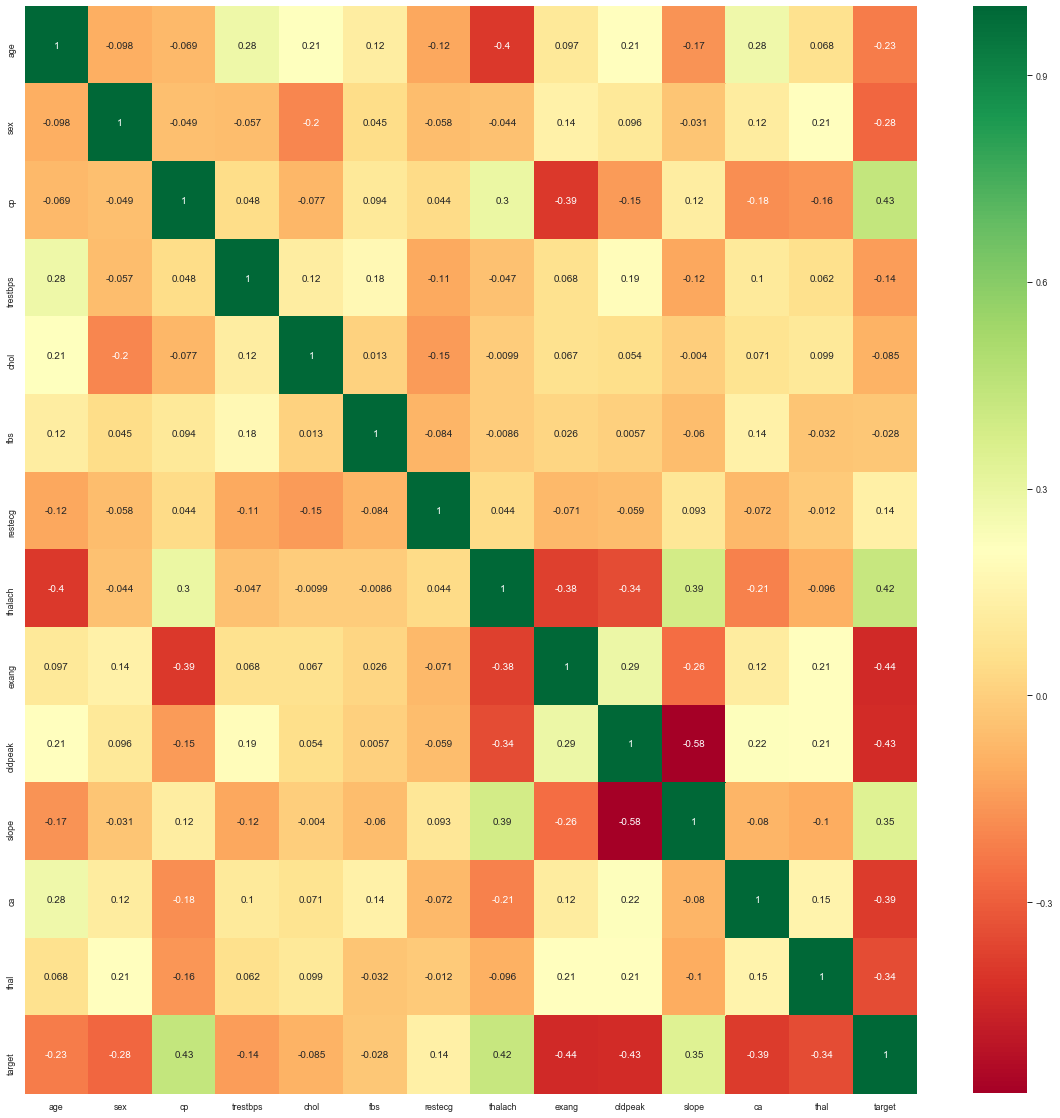

In [44]:
import seaborn as sns 
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [78]:
df_corr=df.corr()['target'][:-1]
feature_list=df_corr[abs(df_corr)>0.1].sort_values(ascending=False)
feature_list
# cp, thalach, slope highly correlated with target

cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2107ae48>,
      dtype=object)

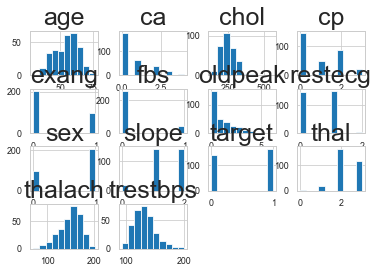

In [45]:
df.hist()

### Counting regarding target
0 - No Heart Disease
1 - Suffer from Heart Disease

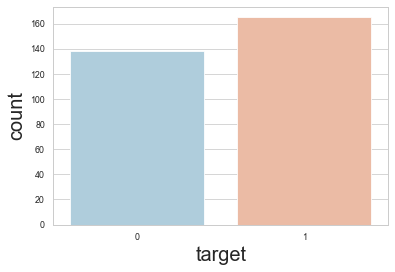

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df,palette='RdBu_r')

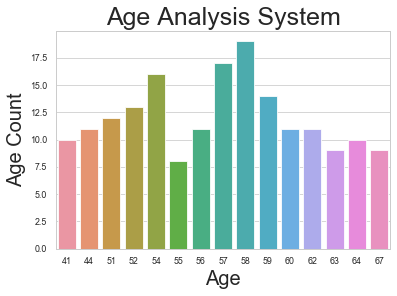

In [75]:
sns.barplot(x=df.age.value_counts()[:15].index,y=df.age.value_counts()[:15].values)
plt.xlabel('Age')
plt.ylabel('Age Count')
plt.title('Age Analysis System')
plt.show()

### Male/Female and Heart Disease (Target)

In [98]:
male_disease=df[(df.sex==1) & (df.target==1)]          
male_NO_disease=df[(df.sex==1) & (df.target==0)]       
print(len(male_disease),"male_disease")
print(len(male_NO_disease),"male_NO_disease")

93 male_disease
114 male_NO_disease


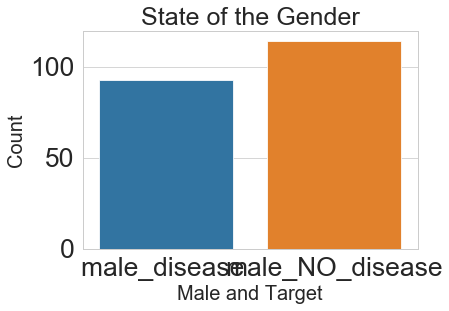

In [100]:
a=len(male_disease)
b=len(male_NO_disease)
sns.barplot(x=['male_disease ','male_NO_disease'],y=[a,b])
plt.xlabel('Male and Target')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

In [101]:
female_disease=df[(df.sex==0) & (df.target==1)]         
female_NO_disease=df[(df.sex==0) & (df.target==0)]       
print(len(female_disease),"female_disease")
print(len(female_NO_disease),"female_NO_disease")

72 female_disease
24 female_NO_disease


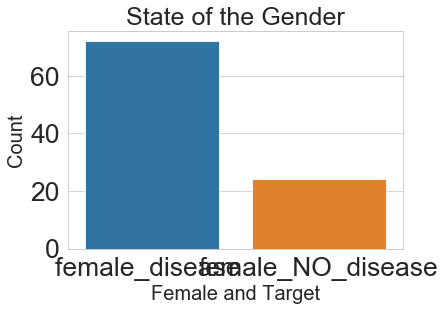

In [102]:
c=len(female_disease)
d=len(female_NO_disease)
sns.barplot(x=['female_disease ','female_NO_disease'],y=[c,d])
plt.xlabel('Female and Target')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

#  Data Processing 


In [94]:
#First use get_dummies method to create dummy columns for categorical variables
dataset= pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [50]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary. Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Accuracy  85.24590163934425


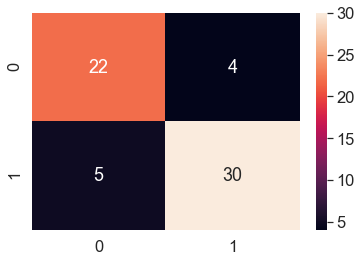

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Model
df = LogisticRegression()
df.fit(X_train, y_train)

# Making predictions
predictions = df.predict(X_test)

# Checking the Accuracy of predictions
print("Accuracy ", df.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(predictions, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [114]:
print(df.predict([[5, 0, 3, 145, 122, 1, 1, 150, 0, 2.3, 1, 0, 1]]))

[1]


In [117]:
print(df.predict([[12, 1, 0, 135, 254, 1, 1, 127, 0, 2.8, 0, 0, 1]]))

[0]


# Random Forest Algorithm

In [52]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [90]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [57]:
print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Random Forest = 0.987603305785124
Accuracy for test set for Random Forest = 0.8524590163934426


In [93]:
classifier = RandomForestClassifier(n_estimators = 10)

score=cross_val_score(classifier,X,y,cv=10)
score.mean()

0.7980756395995551

# Decision Tree

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Accuracy  78.68852459016394


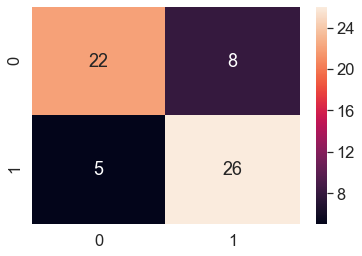

In [109]:
# Model using decision trees
heart_model_dt = DecisionTreeClassifier()

#fiting the model
heart_model_dt.fit(X_train, y_train)

#prediction
dt_predictions = heart_model_dt.predict(X_test)

#Accuracy
print("Accuracy ", heart_model_dt.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(dt_predictions, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [110]:
print(heart_model_dt.predict([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]))

[1]


In [111]:
print(heart_model_dt.predict([[65, 1, 0, 135, 254, 0, 0, 127, 0, 2.8, 1, 1, 3]]))

[0]


# Naive Bayes

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [65]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
y_pred = classifier.predict(X_test)


In [67]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [68]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [69]:
print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes = 0.8347107438016529
Accuracy for test set for Naive Bayes = 0.8524590163934426


# Conclusion